In [22]:
import os
import requests as req
import seaborn as sns
import hypertools as hyp
import pandas as pd
import numpy as np
from helpers import *
import html2text
import markdown
from bs4 import BeautifulSoup
from scipy.spatial.distance import cdist, pdist, squareform
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt

from nltk.corpus import stopwords as sw

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
fileid = '1hCCn31z4HM4IzQi59DP-vvUpYKhlvo2S'
datadir = '../data'
fname = os.path.join(datadir, 'data.csv')

if not os.path.exists(datadir):
    os.makedirs(datadir)
    
if not os.path.exists(fname):
    print('Fetching file from the interwebz!')
    dl(fileid, fname)
else:
    print('Data found!')

Data found!


In [3]:
data = pd.read_csv(fname)

In [4]:
data.head()

,id,title,url,writers,genres,script
0,1,10 Things I Hate About You,http://www.imsdb.com/scripts/10-Things-I-Hate-...,Karen McCullah Lutz;Kirsten Smith;William Shak...,Comedy;Romance,\n\n\n<b><!--\n</b>if (window!= top)\ntop.loca...
1,2,12,http://www.imsdb.com/scripts/12.html,Lawrence Bridges,Comedy,\n\n \n 12 - Script\n
2,3,12 and Holding,http://www.imsdb.com/scripts/12-and-Holding.html,Anthony Cipriano,Drama,\n \n \n ...
3,4,12 Monkeys,http://www.imsdb.com/scripts/12-Monkeys.html,David Peoples;Janet Peoples,Drama;Sci-Fi;Thriller,\n\n\n<b><!--\n</b>if (window!= top)\ntop.loca...
4,5,12 Years a Slave,http://www.imsdb.com/scripts/12-Years-a-Slave....,John Ridley,Drama,\r\n\r\n\r\n 12 YE...


## Add review filenames

In [274]:
i = IMDb()
title = data.loc[2,'title']
record = i.search_movie(title,1)[0]

In [280]:
record.getID()

'0417385'

In [295]:
filenames = ['../../aclImdb/test/urls_neg.txt',
            '../../aclImdb/test/urls_pos.txt',
            '../../aclImdb/train/urls_neg.txt',
            '../../aclImdb/train/urls_pos.txt']
sets = ['test','test','train','train']
sentiments = ['neg','pos','neg','pos']
review_data = pd.DataFrame()
for fi,filename in enumerate(filenames):
    tmp = pd.read_csv('../../aclImdb/test/urls_neg.txt',header=None)
    tmp.columns = ['url']
    for i in tmp.index:
        tmp.loc[i,'imdb_id'] = tmp.loc[i,'url'][28:35]
    tmp['set'] = sets[fi]
    tmp['sentiment'] = sentiments[fi]
    tmp['review_id'] = tmp.index
    review_data = review_data.append(tmp)
review_data.head()

,url,imdb_id,set,sentiment,review_id
0,http://www.imdb.com/title/tt0406816/usercomments,0406816,test,neg,0
1,http://www.imdb.com/title/tt0406816/usercomments,0406816,test,neg,1
2,http://www.imdb.com/title/tt0406816/usercomments,0406816,test,neg,2
3,http://www.imdb.com/title/tt0406816/usercomments,0406816,test,neg,3
4,http://www.imdb.com/title/tt0406816/usercomments,0406816,test,neg,4


In [298]:
review_data.query('review_id == 12499')

,url,imdb_id,set,sentiment,review_id
12499,http://www.imdb.com/title/tt0485161/usercomments,0485161,test,neg,12499
12499,http://www.imdb.com/title/tt0485161/usercomments,0485161,test,pos,12499
12499,http://www.imdb.com/title/tt0485161/usercomments,0485161,train,neg,12499
12499,http://www.imdb.com/title/tt0485161/usercomments,0485161,train,pos,12499


In [326]:
i = IMDb()
for mi,movie in data.query('id < 20').iterrows():
    title = movie['title']
    imdb_info = i.search_movie(title,1)[0]
    imdb_id = imdb_info.getID()
    review_data_movie = review_data.query('imdb_id == @imdb_id')
    print(review_data_movie)
#     if review_data_movie.shape[0] > 0:
        

Empty DataFrame
Columns: [url, imdb_id, set, sentiment, review_id]
Index: []
Empty DataFrame
Columns: [url, imdb_id, set, sentiment, review_id]
Index: []
Empty DataFrame
Columns: [url, imdb_id, set, sentiment, review_id]
Index: []
Empty DataFrame
Columns: [url, imdb_id, set, sentiment, review_id]
Index: []
Empty DataFrame
Columns: [url, imdb_id, set, sentiment, review_id]
Index: []
Empty DataFrame
Columns: [url, imdb_id, set, sentiment, review_id]
Index: []
Empty DataFrame
Columns: [url, imdb_id, set, sentiment, review_id]
Index: []
Empty DataFrame
Columns: [url, imdb_id, set, sentiment, review_id]
Index: []


KeyboardInterrupt: 

In [336]:
data.head()

,id,title,url,writers,genres,script,imdb_id
0,1,10 Things I Hate About You,http://www.imsdb.com/scripts/10-Things-I-Hate-...,Karen McCullah Lutz;Kirsten Smith;William Shak...,Comedy;Romance,\n\n\n<b><!--\n</b>if (window!= top)\ntop.loca...,0147800
1,2,12,http://www.imsdb.com/scripts/12.html,Lawrence Bridges,Comedy,\n\n \n 12 - Script\n,1407084
2,3,12 and Holding,http://www.imsdb.com/scripts/12-and-Holding.html,Anthony Cipriano,Drama,\n \n \n ...,0417385
3,4,12 Monkeys,http://www.imsdb.com/scripts/12-Monkeys.html,David Peoples;Janet Peoples,Drama;Sci-Fi;Thriller,\n\n\n<b><!--\n</b>if (window!= top)\ntop.loca...,0114746
4,5,12 Years a Slave,http://www.imsdb.com/scripts/12-Years-a-Slave....,John Ridley,Drama,\r\n\r\n\r\n 12 YE...,2024544


In [398]:
to_do = []
for i in np.arange(0,len(data)):
    if not type(data.loc[i,'imdb_id']) == np.str:
        if np.isnan(data.loc[i,'imdb_id']):
            to_do.append(i)

In [411]:
imdb_instance = IMDb()
for mi,movie in data.iloc[to_do,:].iterrows():
    title = movie['title']
    imdb_searchresult = imdb_instance.search_movie(title,1)
    if len(imdb_searchresult) > 0:
        imdb_info = imdb_searchresult[0]
        imdb_id = imdb_info.getID()
        data.loc[mi,'imdb_id'] = imdb_id
data.head()

,id,title,url,writers,genres,script,imdb_id
0,1,10 Things I Hate About You,http://www.imsdb.com/scripts/10-Things-I-Hate-...,Karen McCullah Lutz;Kirsten Smith;William Shak...,Comedy;Romance,\n\n\n<b><!--\n</b>if (window!= top)\ntop.loca...,0147800
1,2,12,http://www.imsdb.com/scripts/12.html,Lawrence Bridges,Comedy,\n\n \n 12 - Script\n,1407084
2,3,12 and Holding,http://www.imsdb.com/scripts/12-and-Holding.html,Anthony Cipriano,Drama,\n \n \n ...,0417385
3,4,12 Monkeys,http://www.imsdb.com/scripts/12-Monkeys.html,David Peoples;Janet Peoples,Drama;Sci-Fi;Thriller,\n\n\n<b><!--\n</b>if (window!= top)\ntop.loca...,0114746
4,5,12 Years a Slave,http://www.imsdb.com/scripts/12-Years-a-Slave....,John Ridley,Drama,\r\n\r\n\r\n 12 YE...,2024544


In [412]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

In [413]:
has_reviews = intersection(review_data['imdb_id'].unique(),data['imdb_id'].unique())

In [419]:
np.array(has_reviews)

array(['0110604', '0349903', '0808151', '0120907', '0062622', '0171580',
       '0209958', '0070337', '0317740', '0116209', '0159365', '0151738',
       '0361748', '0166924', '0113253', '0100260', '0118749', '0455857',
       '0238546', '0119925', '0375679', '0199725', '0077405', '0090329',
       '0144814', '0120591', '0963794', '0159382', '0162661', '0110265',
       '0317640', '0074812', '0913425', '0069945', '0134273', '0159206',
       '0333766', '0119217', '0120737', '0318374', '0101393', '0387564',
       '0104691', '0134119', '0417217', '0118158', '0379725', '0113627',
       '0163025', '0120812', '0088323', '0165710', '0093058', '0100405',
       '0109450', '0460627', '0116367', '0271367', '0119229'], dtype='<U7')

In [420]:
data['has_review'] = False
data.loc[data['imdb_id'].isin(has_reviews),'has_review'] = True
data.head()

,id,title,url,writers,genres,script,imdb_id,has_review
0,1,10 Things I Hate About You,http://www.imsdb.com/scripts/10-Things-I-Hate-...,Karen McCullah Lutz;Kirsten Smith;William Shak...,Comedy;Romance,\n\n\n<b><!--\n</b>if (window!= top)\ntop.loca...,0147800,False
1,2,12,http://www.imsdb.com/scripts/12.html,Lawrence Bridges,Comedy,\n\n \n 12 - Script\n,1407084,False
2,3,12 and Holding,http://www.imsdb.com/scripts/12-and-Holding.html,Anthony Cipriano,Drama,\n \n \n ...,0417385,False
3,4,12 Monkeys,http://www.imsdb.com/scripts/12-Monkeys.html,David Peoples;Janet Peoples,Drama;Sci-Fi;Thriller,\n\n\n<b><!--\n</b>if (window!= top)\ntop.loca...,0114746,False
4,5,12 Years a Slave,http://www.imsdb.com/scripts/12-Years-a-Slave....,John Ridley,Drama,\r\n\r\n\r\n 12 YE...,2024544,False


## Plot trajectories of movies in topic space

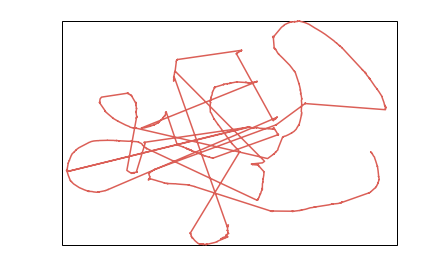

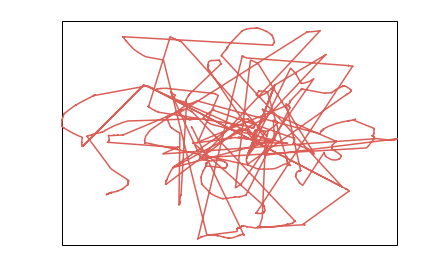

In [421]:
hyp.plot(y, reduce='UMAP', ndims=2) # 10 things I hate about you
hyp.plot(z, reduce='UMAP', ndims=2) # 12 monkeys

##### Problem: now each movie gets its own dimensionality reduction (from 100 to 2) => not in common space. Therefore apply ndim=2 at the moment of fitting the semantic model.

In [422]:
y_small = hyp.tools.format_data(x, corpus='wiki',
      semantic={'model':'LatentDirichletAllocation',
        'params':{'n_components' : 2}},
      vectorizer={'model':'CountVectorizer',
          'params':{'stop_words':sw.words('english')}})

In [423]:
z_small = hyp.tools.format_data(x, corpus='wiki',
      semantic={'model':'LatentDirichletAllocation',
        'params':{'n_components' : 2}},
      vectorizer={'model':'CountVectorizer',
          'params':{'stop_words':sw.words('english')}})

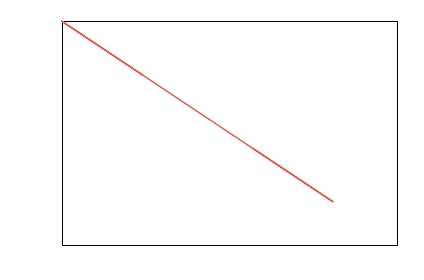

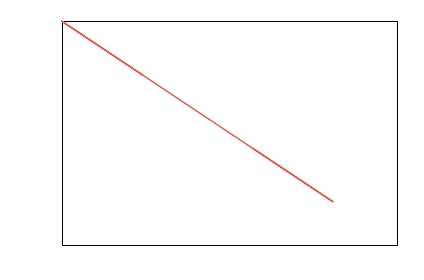

In [424]:
hyp.plot(y_small, reduce='UMAP', ndims=2) # 10 things I hate about you
hyp.plot(z_small, reduce='UMAP', ndims=2) # 12 monkeys

##### That doesn't seem to work... instead, run the model with 100 topics and then run a joint dimensionality reduction (PCA) on both movies

In [425]:
import sklearn

In [426]:
PCA = sklearn.decomposition.PCA(n_components=2)

In [427]:
total_trajectory = np.append(y[0],z[0],axis=0)

In [428]:
PCA.fit(total_trajectory)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [429]:
y_trans = PCA.transform(y[0])
z_trans = PCA.transform(z[0])

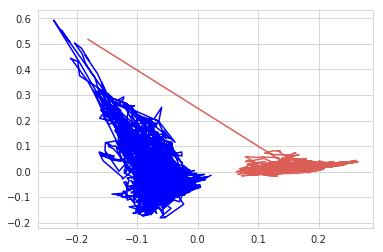

In [430]:
plt.plot(y_trans[:,0],y_trans[:,1])
plt.plot(z_trans[:,0],z_trans[:,1],'b')

##### This might work! So let's pick 2 movies that are very similar (e.g. both comedies about the same topic) and one that's probably very different:

In [229]:
genres = ['Sci-Fi','Comedy','Drama','Adventure']
titles_by_genre = {}
for genre in genres:
    genre_titles = []
    for ri,row in data.iterrows():
        if genre in row['genres']:
            genre_titles.append(row['title'])
    titles_by_genre[genre] = genre_titles

In [233]:
titles = [titles_by_genre['Sci-Fi'][10:12],
          titles_by_genre['Comedy'][10:12]]
movie_ids = []
for title in titles:
    print(title)
    movie_ids.append(data.query('title == @title').id.values[0])
print(movie_ids)

['Alien Nation', 'Alien vs. Predator']
['Addams Family, The', 'Adventures of Buckaroo Banzai Across the Eighth Dimension, The']
[44, 30]


In [234]:
# results = dict()
window_size = 25
n_components = 100
for mi, movie_id in enumerate(movie_ids):
    print('analyzing movie %i'%movie_id)
    sliding_windows = get_windows(data.query('id == @movie_id')['script'].values[0],
                                  wsize=window_size)
    topics_wiki = hyp.tools.format_data(sliding_windows, corpus='wiki',
      semantic={'model':'LatentDirichletAllocation',
        'params':{'n_components' : n_components}},
      vectorizer={'model':'CountVectorizer',
          'params':{'stop_words':sw.words('english')}})
    results['movie_%i'%movie_id] = {'movie_id':movie_id,
                                   'topics_wiki':topics_wiki[0]}

analyzing movie 44
analyzing movie 30


In [439]:
movie_ids = [list(results.keys())[i][6:] for i in range(len(results))]
movie_ids

['42', '43', '19', '1', '44', '30']

In [466]:
titles = [data.loc[data['id']==int(movie_id),'title'].values[0] for movie_id in movie_ids]

In [467]:
titles

['Alien',
 'Alien 3',
 '500 Days of Summer',
 '10 Things I Hate About You',
 'Alien Nation',
 'Addams Family, The']

In [441]:
# Append all
for mi, movie_id in enumerate(movie_ids):
    topics_wiki = results['movie_%s'%movie_id]['topics_wiki']
    if mi == 0:
        total_trajectory = topics_wiki
    else:
        total_trajectory = np.append(total_trajectory,topics_wiki,axis=0)

In [442]:
PCA = sklearn.decomposition.PCA(n_components=3)

In [443]:
PCA.fit(total_trajectory)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [445]:
transforms = dict()
for mi, movie_id in enumerate(movie_ids):
    transforms['movie_%s'%movie_id] = PCA.transform(results['movie_%s'%movie_id]['topics_wiki'])

Text(0.5,1,'Movies in wikipedia topic space')

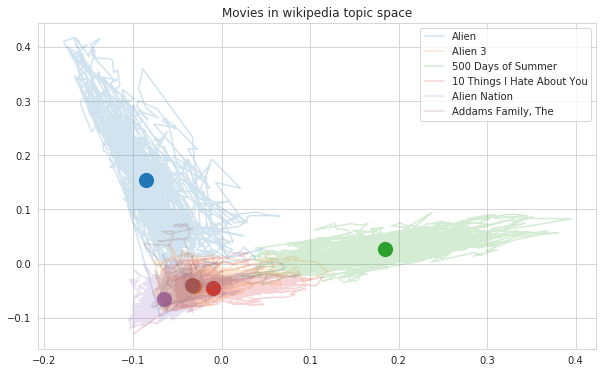

In [471]:
colors = sns.color_palette('tab10',len(movie_ids))
fig = plt.figure(figsize=[10,6])
for mi, movie_id in enumerate(movie_ids):
    dat = transforms['movie_%s'%movie_id]
    plt.plot(dat[:,0],dat[:,1],
            c=colors[mi], alpha = .2)
    plt.scatter(np.mean(dat[:,0]),np.mean(dat[:,1]),
                s=200,c=colors[mi],marker='o')
plt.legend(titles)
plt.title('Movies in wikipedia topic space')

## Compute similarity between movie script and review